In [1]:
import pandas as pd
import numpy as np
import openpyxl

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

# for resampling 
from imblearn.over_sampling import RandomOverSampler

# for modeling
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier,  LGBMRegressor

# ANN Struktur
import keras
from keras.utils import np_utils
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import Dense, Activation, Dropout

# for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

# for clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering

## Klasifikasi

In [2]:
data = pd.read_excel('FIX.xlsx',sheet_name=2)
data

,COILNO,ORDERNO,SO,ITEM,SIZE_,QUALCODE,GRADE,SPEC,SUBSPEC,THICK,...,OA2VNWIDTH,OA2VNWEIGHT,REMARK,OBKDFMILL1,OBKDFCODE1,OBKDFMILL2,OBKDFCODE2,OBKDFMILL3,OBKDFCODE3,Cycle
0,793941VB,27118888,6000051323,50,"1,00 X 1219 X COIL",CQ2,3A0603,SNI 07 3567,BJDC-SR,1.00,...,1251.0,7.819,- ...,X,60B,K,37A,,,HEAVY
1,845516V,27119071,6000050693,60,"1,30 X 1219 X COIL",CQ4,1K1407,MPIC,MPIC,1.30,...,1230.0,19.640,- ...,H,20B,K,37A,H,59A,HEAVY
2,845859VA,27119164,6000052359,50,"0,35 X 1170 X COIL",CQUN1,3A0603,SNI 07 3567,BJDC-1R,0.35,...,1202.0,16.978,- ...,F,11,F,70A,F,69,MEDIUM
3,848033VB,27119203,6000052359,50,"0,35 X 1170 X COIL",CQUN1,3A0603,SNI 07 3567,BJDC-1R,0.35,...,1202.0,18.882,- ...,F,11,F,13,F,27A,MEDIUM
4,868211VA,27117709,6000052359,80,"0,45 X 914 X COIL",CQUN1,3A0603,SNI 07 3567,BJDC-1R,0.45,...,946.0,6.680,- ...,F,2,F,98,F,60,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477094,BGA114V,17067401,6000074610,30,"0,70 X 1000 X COIL",CQ2,3A0603,JIS G3141,SPCC-SD,0.00,...,1016.0,16.830,- ...,,,,,,,LITE
477095,BDY169V,17064503,6000072642,10,"0,50 X 1030 X COIL",CQ2,3A0603,JIS G3141,SPCC-SD,0.00,...,1046.0,16.420,- ...,,,,,,,LITE
477096,BEN934V,17065724,6000073153,20,"1,20 X 1219 X COIL",CQ2,1A0503,JIS G3141,SPCC-SD,0.00,...,1235.0,23.120,- ...,,,,,,,LITE
477097,BFD911V,17066503,6000073749,70,"0,95 X 1219 X COIL",CQ2,1A0603,JIS G3141,SPCCT-SD,0.00,...,1235.0,19.310,- ...,,,,,,,LITE


In [3]:
data['LOCATION'].value_counts()

WHS         163942
TCM          95756
EC1          42841
EC2          40316
BAF          33618
TPM          32603
REC          29475
MPL          27209
PRP           7452
SHR           2605
CAL            898
SLT            377
FUD              7
Name: LOCATION, dtype: int64

### Exploratory Data Analysis

In [4]:
data.columns

Index(['COILNO', 'ORDERNO', 'SO', 'ITEM', 'SIZE_', 'QUALCODE', 'GRADE', 'SPEC',
       'SUBSPEC', 'THICK', 'WIDTH', 'WEIGHT', 'DISPCODE', 'PRODUNIT',
       'LOCATION', 'PRODDATE', 'OBKPRODTND', 'OA2VNGAUGE', 'OA2VNWIDTH',
       'OA2VNWEIGHT', 'REMARK', 'OBKDFMILL1', 'OBKDFCODE1', 'OBKDFMILL2',
       'OBKDFCODE2', 'OBKDFMILL3', 'OBKDFCODE3', 'Cycle'],
      dtype='object')

#### Cleansing Data

In [5]:
df = data[data['LOCATION'].isin(['WHS     ', 'PRP'])]
df

,COILNO,ORDERNO,SO,ITEM,SIZE_,QUALCODE,GRADE,SPEC,SUBSPEC,THICK,...,OA2VNWIDTH,OA2VNWEIGHT,REMARK,OBKDFMILL1,OBKDFCODE1,OBKDFMILL2,OBKDFCODE2,OBKDFMILL3,OBKDFCODE3,Cycle
0,793941VB,27118888,6000051323,50,"1,00 X 1219 X COIL",CQ2,3A0603,SNI 07 3567,BJDC-SR,1.00,...,1251.0,7.819,- ...,X,60B,K,37A,,,HEAVY
1,845516V,27119071,6000050693,60,"1,30 X 1219 X COIL",CQ4,1K1407,MPIC,MPIC,1.30,...,1230.0,19.640,- ...,H,20B,K,37A,H,59A,HEAVY
2,845859VA,27119164,6000052359,50,"0,35 X 1170 X COIL",CQUN1,3A0603,SNI 07 3567,BJDC-1R,0.35,...,1202.0,16.978,- ...,F,11,F,70A,F,69,MEDIUM
3,848033VB,27119203,6000052359,50,"0,35 X 1170 X COIL",CQUN1,3A0603,SNI 07 3567,BJDC-1R,0.35,...,1202.0,18.882,- ...,F,11,F,13,F,27A,MEDIUM
4,868211VA,27117709,6000052359,80,"0,45 X 914 X COIL",CQUN1,3A0603,SNI 07 3567,BJDC-1R,0.45,...,946.0,6.680,- ...,F,2,F,98,F,60,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474813,BEA040V,27171350,6000072596,10,"0,70 X 1219 X COIL",CQUN3,1A0503,SNI 07 3567,BJDC-1R,0.70,...,1250.0,22.520,- ...,F,11,F,13,F,27A,HEAVY
475332,BDL654V,17062167,6000071488,20,"0,25 X 914 X COIL",CQUN1,1A0503,SNI 07 3567,BJDC-1R,0.25,...,945.0,16.880,- ...,F,13,F,11,F,27A,MEDIUM
475987,BDJ672V,17061544,6000070710,10,"0,20 X 914 X COIL",CQUN1,3A0603,SNI 07 3567,BJDC-1R,0.20,...,945.0,16.980,- ...,F,13,F,11,F,27A,LITE
476125,BFR582V,17066785,6000074377,10,"0,20 X 914 X COIL",CQUN3,1A0503,SNI 07 3567,BJDC-1R,0.20,...,945.0,16.920,- ...,F,70A,F,17,F,11,LITE


In [6]:
df = df.replace(' ', np.nan)

#### Missing value

In [7]:
df.isnull().sum()

COILNO             0
ORDERNO            0
SO                 0
ITEM               0
SIZE_              0
QUALCODE           0
GRADE              0
SPEC               0
SUBSPEC            0
THICK              0
WIDTH              0
WEIGHT             0
DISPCODE           0
PRODUNIT           0
LOCATION           0
PRODDATE           0
OBKPRODTND         0
OA2VNGAUGE         0
OA2VNWIDTH         0
OA2VNWEIGHT        0
REMARK             0
OBKDFMILL1        45
OBKDFCODE1         0
OBKDFMILL2      2495
OBKDFCODE2         0
OBKDFMILL3     14008
OBKDFCODE3         0
Cycle              0
dtype: int64

In [8]:
missing_value = pd.DataFrame(df.isnull().sum(), columns=['missing_value'])
missing_value.to_excel('missing_value.xlsx', index = True)
missing_value

,missing_value
COILNO,0
ORDERNO,0
SO,0
ITEM,0
SIZE_,0
QUALCODE,0
GRADE,0
SPEC,0
SUBSPEC,0
THICK,0


In [9]:
df.shape

(163942, 28)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163942 entries, 0 to 476681
Data columns (total 28 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   COILNO       163942 non-null  object        
 1   ORDERNO      163942 non-null  int64         
 2   SO           163942 non-null  object        
 3   ITEM         163942 non-null  object        
 4   SIZE_        163942 non-null  object        
 5   QUALCODE     163942 non-null  object        
 6   GRADE        163942 non-null  object        
 7   SPEC         163942 non-null  object        
 8   SUBSPEC      163942 non-null  object        
 9   THICK        163942 non-null  float64       
 10  WIDTH        163942 non-null  float64       
 11  WEIGHT       163942 non-null  float64       
 12  DISPCODE     163942 non-null  int64         
 13  PRODUNIT     163942 non-null  object        
 14  LOCATION     163942 non-null  object        
 15  PRODDATE     163942 non-null  date

In [11]:
columns = ['OBKDFMILL1', 'OBKDFMILL2','OBKDFMILL3']

df.drop(columns=columns, inplace=True)
df

,COILNO,ORDERNO,SO,ITEM,SIZE_,QUALCODE,GRADE,SPEC,SUBSPEC,THICK,...,PRODDATE,OBKPRODTND,OA2VNGAUGE,OA2VNWIDTH,OA2VNWEIGHT,REMARK,OBKDFCODE1,OBKDFCODE2,OBKDFCODE3,Cycle
0,793941VB,27118888,6000051323,50,"1,00 X 1219 X COIL",CQ2,3A0603,SNI 07 3567,BJDC-SR,1.00,...,2019-01-15,15/01/2019,2.25,1251.0,7.819,- ...,60B,37A,,HEAVY
1,845516V,27119071,6000050693,60,"1,30 X 1219 X COIL",CQ4,1K1407,MPIC,MPIC,1.30,...,2019-01-23,23/01/2019,3.50,1230.0,19.640,- ...,20B,37A,59A,HEAVY
2,845859VA,27119164,6000052359,50,"0,35 X 1170 X COIL",CQUN1,3A0603,SNI 07 3567,BJDC-1R,0.35,...,2019-01-23,23/01/2019,2.25,1202.0,16.978,- ...,11,70A,69,MEDIUM
3,848033VB,27119203,6000052359,50,"0,35 X 1170 X COIL",CQUN1,3A0603,SNI 07 3567,BJDC-1R,0.35,...,2019-01-24,24/01/2019,2.25,1202.0,18.882,- ...,11,13,27A,MEDIUM
4,868211VA,27117709,6000052359,80,"0,45 X 914 X COIL",CQUN1,3A0603,SNI 07 3567,BJDC-1R,0.45,...,2019-01-02,2019-02-01 00:00:00,2.25,946.0,6.680,- ...,2,98,60,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474813,BEA040V,27171350,6000072596,10,"0,70 X 1219 X COIL",CQUN3,1A0503,SNI 07 3567,BJDC-1R,0.70,...,2022-08-17,17/08/2022,2.50,1250.0,22.520,- ...,11,13,27A,HEAVY
475332,BDL654V,17062167,6000071488,20,"0,25 X 914 X COIL",CQUN1,1A0503,SNI 07 3567,BJDC-1R,0.25,...,2022-07-08,2022-08-07 00:00:00,2.25,945.0,16.880,- ...,13,11,27A,MEDIUM
475987,BDJ672V,17061544,6000070710,10,"0,20 X 914 X COIL",CQUN1,3A0603,SNI 07 3567,BJDC-1R,0.20,...,2022-07-01,2022-01-07 00:00:00,2.00,945.0,16.980,- ...,13,11,27A,LITE
476125,BFR582V,17066785,6000074377,10,"0,20 X 914 X COIL",CQUN3,1A0503,SNI 07 3567,BJDC-1R,0.20,...,2022-11-24,24/11/2022,2.00,945.0,16.920,- ...,70A,17,11,LITE


In [12]:
cleansing = pd.DataFrame(df.isnull().sum(), columns=['missing_value'])
cleansing.to_excel('cleansing.xlsx', index = True)
cleansing

,missing_value
COILNO,0
ORDERNO,0
SO,0
ITEM,0
SIZE_,0
QUALCODE,0
GRADE,0
SPEC,0
SUBSPEC,0
THICK,0


#### Data duplicate

In [13]:
df.duplicated().any()

False

In [14]:
data_duplicate = pd.DataFrame(df.duplicated(), columns=['duplicated'])
data_duplicate.to_excel('duplicated.xlsx')
data_duplicate

,duplicated
0,False
1,False
2,False
3,False
4,False
...,...
474813,False
475332,False
475987,False
476125,False


#### Feature Engineering

In [15]:
columns = ['COILNO', 'ORDERNO', 'SO', 'ITEM','SIZE_', 'GRADE', 'SUBSPEC', 'DISPCODE', 'PRODUNIT', 
           'LOCATION', 'PRODDATE', 'OBKPRODTND', 'REMARK', 'OBKDFCODE1', 'OBKDFCODE2', 'OBKDFCODE3',
           'OA2VNGAUGE','OA2VNWEIGHT','OA2VNWEIGHT','OA2VNWIDTH']

df.drop(columns=columns, inplace=True)
df

,QUALCODE,SPEC,THICK,WIDTH,WEIGHT,Cycle
0,CQ2,SNI 07 3567,1.00,1219.0,10.03,HEAVY
1,CQ4,MPIC,1.30,1219.0,18.50,HEAVY
2,CQUN1,SNI 07 3567,0.35,1170.0,15.56,MEDIUM
3,CQUN1,SNI 07 3567,0.35,1170.0,17.38,MEDIUM
4,CQUN1,SNI 07 3567,0.45,914.0,6.06,MEDIUM
...,...,...,...,...,...,...
474813,CQUN3,SNI 07 3567,0.70,1219.0,20.90,HEAVY
475332,CQUN1,SNI 07 3567,0.25,914.0,15.54,MEDIUM
475987,CQUN1,SNI 07 3567,0.20,914.0,15.53,LITE
476125,CQUN3,SNI 07 3567,0.20,914.0,15.57,LITE


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163942 entries, 0 to 476681
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   QUALCODE  163942 non-null  object 
 1   SPEC      163942 non-null  object 
 2   THICK     163942 non-null  float64
 3   WIDTH     163942 non-null  float64
 4   WEIGHT    163942 non-null  float64
 5   Cycle     163942 non-null  object 
dtypes: float64(3), object(3)
memory usage: 8.8+ MB


In [17]:
df.to_excel('feature_engineering.xlsx', index = None)

In [18]:
df['Cycle'].value_counts()

HEAVY     91575
MEDIUM    47863
LITE      23231
HRPO       1273
Name: Cycle, dtype: int64

In [19]:
encoder = LabelEncoder()
df['QUALCODE'] = encoder.fit_transform(df['QUALCODE'])
df['SPEC'] = encoder.fit_transform(df['SPEC'])
df['Cycle'] = encoder.fit_transform(df['Cycle'])
df.to_excel('encoding.xlsx', index = None)
df

,QUALCODE,SPEC,THICK,WIDTH,WEIGHT,Cycle
0,3,25,1.00,1219.0,10.03,0
1,12,21,1.30,1219.0,18.50,0
2,17,25,0.35,1170.0,15.56,3
3,17,25,0.35,1170.0,17.38,3
4,17,25,0.45,914.0,6.06,3
...,...,...,...,...,...,...
474813,18,25,0.70,1219.0,20.90,0
475332,17,25,0.25,914.0,15.54,3
475987,17,25,0.20,914.0,15.53,2
476125,18,25,0.20,914.0,15.57,2


In [20]:
df['QUALCODE'].value_counts()

18    66609
3     48013
12    20871
17     9706
16     5982
2      1843
11     1650
24     1464
26     1273
25     1218
4      1217
6       981
9       883
21      735
22      567
5       454
13      270
20       69
8        38
23       31
7        21
10       18
19       11
15        9
14        5
1         3
0         1
Name: QUALCODE, dtype: int64

In [21]:
df.corr()

,QUALCODE,SPEC,THICK,WIDTH,WEIGHT,Cycle
QUALCODE,1.000000,0.641045,-0.393095,-0.297621,0.343225,0.405428
SPEC,0.641045,1.000000,-0.399649,-0.159204,0.336261,0.371533
THICK,-0.393095,-0.399649,1.000000,0.363202,-0.073993,-0.581928
WIDTH,-0.297621,-0.159204,0.363202,1.000000,0.302802,-0.243639
WEIGHT,0.343225,0.336261,-0.073993,0.302802,1.000000,0.157227
Cycle,0.405428,0.371533,-0.581928,-0.243639,0.157227,1.000000


In [22]:
df.groupby('Cycle')['THICK','WIDTH','WEIGHT'].describe()

THICK                                                          WIDTH  \
         count      mean           std   min   25%   50%   75%   max    count   
Cycle                                                                           
0      91575.0  0.941261  4.306019e-01  0.60  0.65  0.80  1.00  3.00  91575.0   
1       1273.0  3.007471  8.225102e-01  0.00  2.50  2.90  3.20  5.70   1273.0   
2      23231.0  0.200000  8.759848e-14  0.20  0.20  0.20  0.20  0.20  23231.0   
3      47863.0  0.368302  9.526255e-02  0.23  0.30  0.35  0.45  0.58  47863.0   

                    ...                   WEIGHT                             \
              mean  ...     75%     max    count       mean       std   min   
Cycle               ...                                                       
0      1135.385476  ...  1219.0  1234.0  91575.0   9.734686  5.801290  0.36   
1      1156.703849  ...  1216.0  1250.0   1273.0  11.281781  4.597024  1.09   
2       900.542034  ...   914.0  1060.0  23231.0   9.026439  4.307454  0.50   
3      1082.430144  ...  1219.0  1245.0  47863.0  12.187309  5.866097  0.50   

                                    
          25%    50%    75%    max  
Cycle                               
0      5.1200   9.22  10.89  22.30  
1      8.5600  10.13  15.02  21.38  
2      6.6625   7.67  14.17  17.82  
3      7.1950  14.49  15.93  22.18  

[4 rows x 24 columns]

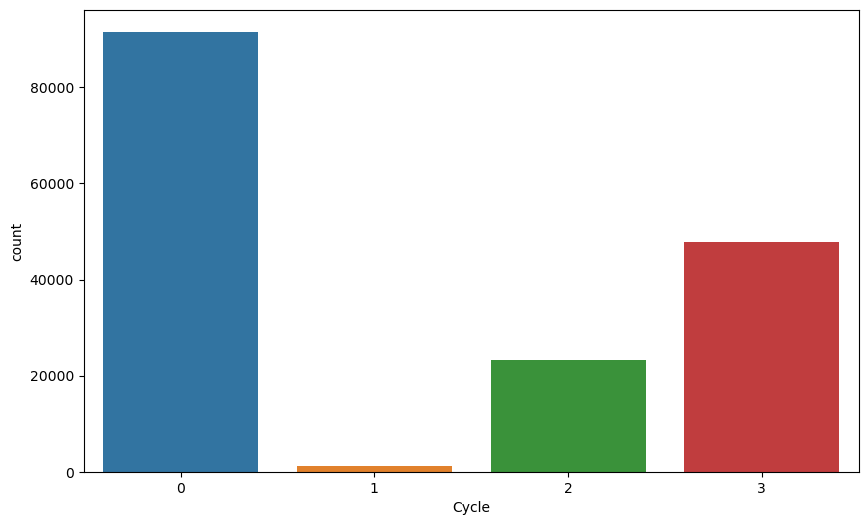

In [23]:
#Output variable
fig = plt.figure(figsize = (10,6))
sns.countplot(x=df['Cycle'])
plt.show()

- __0 = HEAVY__ 
- __1 = HRPO__
- __2 = LITE__
- __3 = MEDIUM__

In [24]:
df['THICK'].value_counts()

0.20    23231
0.70    17804
0.25    11640
0.60    10445
0.90    10048
        ...  
1.27        1
2.58        1
3.17        1
0.58        1
0.00        1
Name: THICK, Length: 126, dtype: int64

### Resamling data

In [25]:
X = df.drop(columns='Cycle')
y = df.Cycle

oversample = RandomOverSampler(sampling_strategy='auto')

X_ros, y_ros = oversample.fit_resample(X, y)

In [26]:
y_ros.value_counts()

0    91575
3    91575
2    91575
1    91575
Name: Cycle, dtype: int64

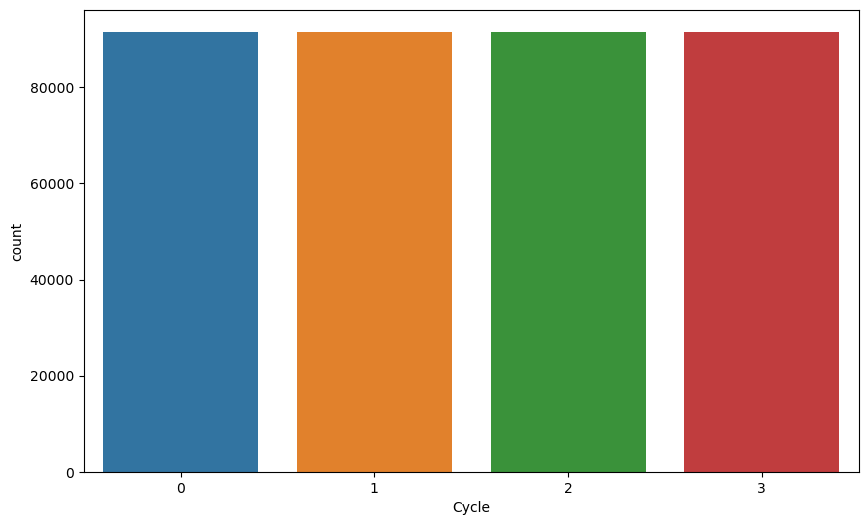

In [27]:
# Output variable
fig = plt.figure(figsize = (10,6))
sns.countplot(x=y_ros)
plt.show()

In [28]:
X_ros

,QUALCODE,SPEC,THICK,WIDTH,WEIGHT
0,3,25,1.00,1219.0,10.030
1,12,21,1.30,1219.0,18.500
2,17,25,0.35,1170.0,15.560
3,17,25,0.35,1170.0,17.380
4,17,25,0.45,914.0,6.060
...,...,...,...,...,...
366295,18,25,0.45,1219.0,1.100
366296,2,25,0.30,882.0,7.985
366297,18,25,0.25,914.0,15.560
366298,18,25,0.25,1219.0,18.250


## Splitting dataset

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((329670, 5), (36630, 5), (329670,), (36630,))

In [30]:
X_train

,QUALCODE,SPEC,THICK,WIDTH,WEIGHT
351213,18,25,0.25,914.0,9.970
81886,3,25,0.60,1219.0,6.585
345437,18,25,0.25,914.0,14.430
157136,3,7,0.40,1219.0,7.305
75061,18,25,0.50,1219.0,9.130
...,...,...,...,...,...
259178,22,24,0.20,914.0,7.545
365838,17,25,0.35,914.0,9.020
131932,18,7,0.42,940.0,15.670
146867,17,25,0.45,940.0,15.230


In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329670 entries, 351213 to 121958
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   QUALCODE  329670 non-null  int32  
 1   SPEC      329670 non-null  int32  
 2   THICK     329670 non-null  float64
 3   WIDTH     329670 non-null  float64
 4   WEIGHT    329670 non-null  float64
dtypes: float64(3), int32(2)
memory usage: 12.6 MB


In [32]:
X_train['QUALCODE']=X_train['QUALCODE'].astype('category')
X_train['SPEC']=X_train['SPEC'].astype('category')
X_test['QUALCODE']=X_test['QUALCODE'].astype('category')
X_test['SPEC']=X_test['SPEC'].astype('category')

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329670 entries, 351213 to 121958
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   QUALCODE  329670 non-null  category
 1   SPEC      329670 non-null  category
 2   THICK     329670 non-null  float64 
 3   WIDTH     329670 non-null  float64 
 4   WEIGHT    329670 non-null  float64 
dtypes: category(2), float64(3)
memory usage: 10.7 MB


#### Deteksi Outlier

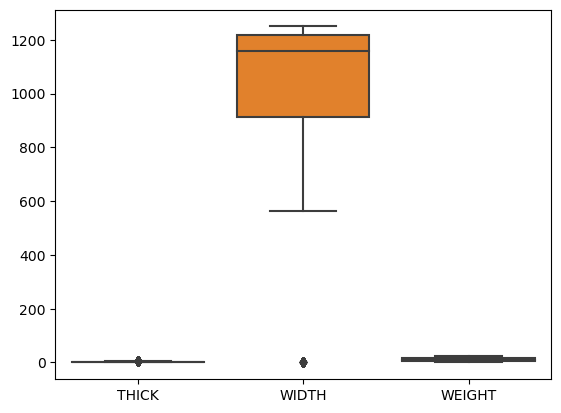

In [34]:
sns.boxplot(X_train)
plt.savefig("out1.jpg")

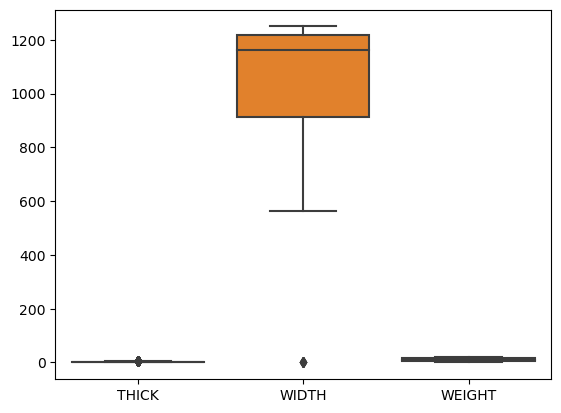

In [35]:
sns.boxplot(X_test)
plt.savefig("out2.jpg")

#### Transformasi Data

In [36]:
X_train.columns

Index(['QUALCODE', 'SPEC', 'THICK', 'WIDTH', 'WEIGHT'], dtype='object')

In [37]:
columns = ['THICK','WIDTH','WEIGHT']
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train[columns])
X_test_scale = scaler.transform(X_test[columns])

In [38]:
X_train[columns]=X_train_scale
X_test[columns]=X_test_scale

In [39]:
X_train.to_excel('normalisasi.xlsx', index = None)
X_train

,QUALCODE,SPEC,THICK,WIDTH,WEIGHT
351213,18,25,-0.725624,-0.969346,-0.109763
81886,3,25,-0.436960,0.942979,-0.744405
345437,18,25,-0.725624,-0.969346,0.726426
157136,3,7,-0.601911,0.942979,-0.609415
75061,18,25,-0.519436,0.942979,-0.267252
...,...,...,...,...,...
259178,22,24,-0.766862,-0.969346,-0.564418
365838,17,25,-0.643149,-0.969346,-0.287875
131932,18,7,-0.585416,-0.806328,0.958909
146867,17,25,-0.560673,-0.806328,0.876415


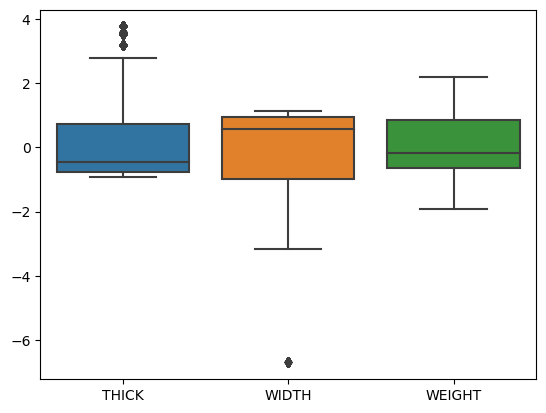

In [40]:
sns.boxplot(X_train)
plt.savefig("out3.jpg")

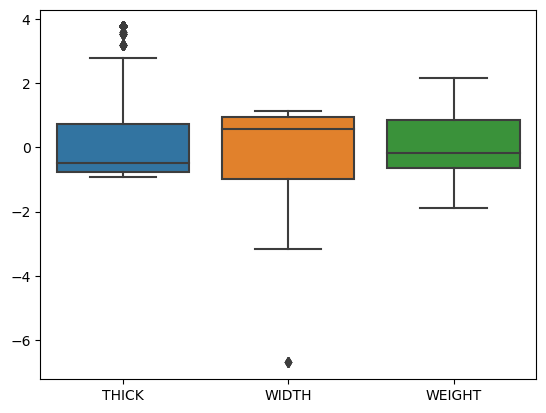

In [41]:
sns.boxplot(X_test)
plt.savefig("out4.jpg")

In [42]:
X_train['QUALCODE']=X_train['QUALCODE'].astype('int')
X_train['SPEC']=X_train['SPEC'].astype('int')
X_test['QUALCODE']=X_test['QUALCODE'].astype('int')
X_test['SPEC']=X_test['SPEC'].astype('int')

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329670 entries, 351213 to 121958
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   QUALCODE  329670 non-null  int32  
 1   SPEC      329670 non-null  int32  
 2   THICK     329670 non-null  float64
 3   WIDTH     329670 non-null  float64
 4   WEIGHT    329670 non-null  float64
dtypes: float64(3), int32(2)
memory usage: 12.6 MB


## KNN Model

#### Klasifikasi

In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Evaluate model

In [45]:
knn_pred = knn.predict(X_test)
knn_pred

array([3, 0, 0, ..., 2, 1, 2])

In [46]:
y_test = y_test
y_test

117524    3
129051    0
118113    0
222701    1
180495    1
         ..
235954    1
9381      0
297108    2
206941    1
256003    2
Name: Cycle, Length: 36630, dtype: int32

In [47]:
print ('accuracy_score: ',accuracy_score(y_test, knn_pred))
print ('f1_score: ',f1_score(y_test, knn_pred, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test, knn_pred, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test, knn_pred, pos_label='positive', average='micro'))

accuracy_score:  0.9992901992901992
f1_score:  0.9992901992901992
recall_score:  0.9992901992901992
precision_score:  0.9992901992901992


In [48]:
print(classification_report(y_test, knn_pred, target_names=['HEAVY', 'HRPO', 'LITE', 'MEDIUM']))

              precision    recall  f1-score   support

       HEAVY       1.00      1.00      1.00      9147
        HRPO       1.00      1.00      1.00      9126
        LITE       1.00      1.00      1.00      9153
      MEDIUM       1.00      1.00      1.00      9204

    accuracy                           1.00     36630
   macro avg       1.00      1.00      1.00     36630
weighted avg       1.00      1.00      1.00     36630



In [49]:
cm = confusion_matrix(y_test, knn_pred)
cm

array([[9133,    0,    1,   13],
       [   0, 9126,    0,    0],
       [   0,    0, 9153,    0],
       [   4,    0,    8, 9192]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

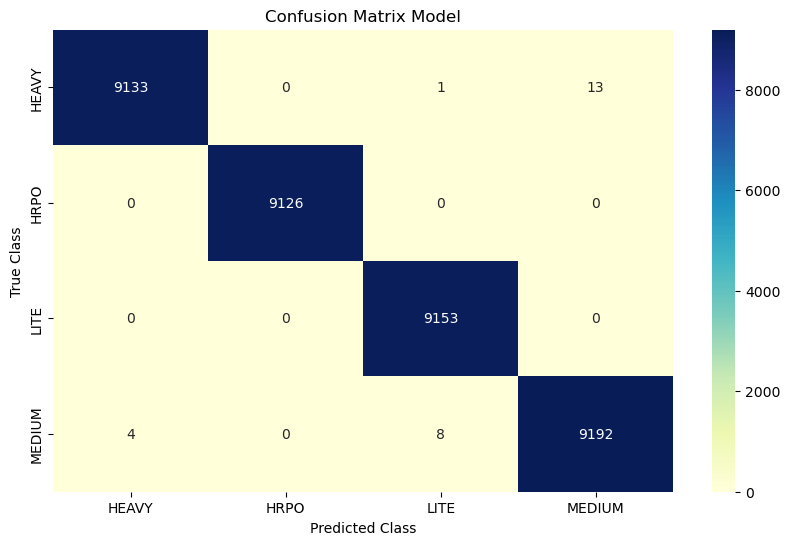

In [50]:
fig = plt.figure(figsize = (10, 6))
target_names=['HEAVY', 'HRPO', 'LITE', 'MEDIUM']
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu', yticklabels=target_names, xticklabels=target_names)

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

#### Regressor

In [51]:
knn_r = KNeighborsRegressor()
knn_r.fit(X_train, y_train)

KNeighborsRegressor()

In [52]:
knn_r_pred = np.round(knn_r.predict(X_test))
knn_r_pred

array([3., 0., 0., ..., 2., 1., 2.])

In [53]:
y_test = y_test
y_test

117524    3
129051    0
118113    0
222701    1
180495    1
         ..
235954    1
9381      0
297108    2
206941    1
256003    2
Name: Cycle, Length: 36630, dtype: int32

In [54]:
print ('accuracy_score: ',accuracy_score(y_test, knn_pred))
print ('f1_score: ',f1_score(y_test, knn_pred, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test, knn_pred, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test, knn_pred, pos_label='positive', average='micro'))

accuracy_score:  0.9992901992901992
f1_score:  0.9992901992901992
recall_score:  0.9992901992901992
precision_score:  0.9992901992901992


## Decision Tree Model

In [55]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array([3, 0, 0, ..., 2, 1, 2])

In [57]:
print ('accuracy_score: ',accuracy_score(y_test,dtree_pred))
print ('f1_score: ',f1_score(y_test,dtree_pred, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test,dtree_pred, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test,dtree_pred, pos_label='positive', average='micro'))

accuracy_score:  1.0
f1_score:  1.0
recall_score:  1.0
precision_score:  1.0


In [58]:
print(classification_report(y_test, dtree_pred, target_names=['HEAVY', 'HRPO', 'LITE', 'MEDIUM']))

              precision    recall  f1-score   support

       HEAVY       1.00      1.00      1.00      9147
        HRPO       1.00      1.00      1.00      9126
        LITE       1.00      1.00      1.00      9153
      MEDIUM       1.00      1.00      1.00      9204

    accuracy                           1.00     36630
   macro avg       1.00      1.00      1.00     36630
weighted avg       1.00      1.00      1.00     36630



In [59]:
cm = confusion_matrix(y_test, dtree_pred)
cm

array([[9147,    0,    0,    0],
       [   0, 9126,    0,    0],
       [   0,    0, 9153,    0],
       [   0,    0,    0, 9204]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

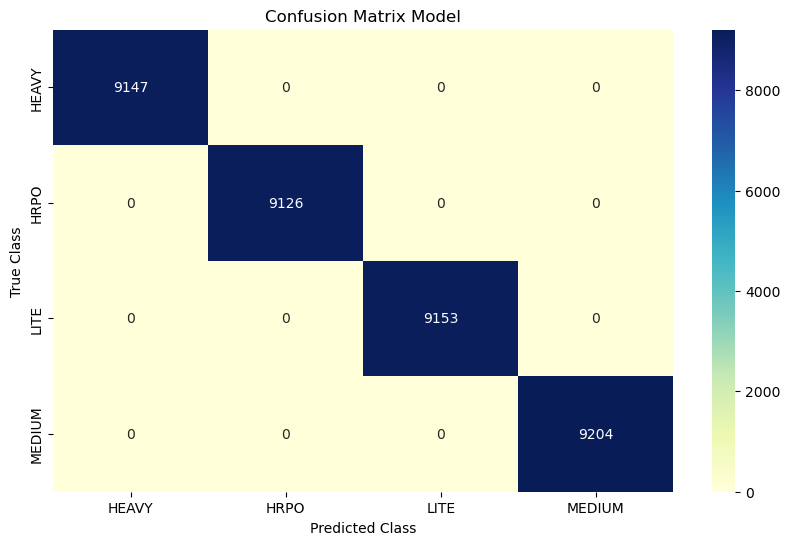

In [60]:
fig = plt.figure(figsize = (10, 6))
target_names=['HEAVY', 'HRPO', 'LITE', 'MEDIUM']
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu', yticklabels=target_names, xticklabels=target_names)

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

#### Regressor

In [61]:
dtree_r = DecisionTreeRegressor()
dtree_r.fit(X_train, y_train)

DecisionTreeRegressor()

In [62]:
dtree_r_pred = np.round(dtree_r.predict(X_test))
dtree_r_pred

array([3., 0., 0., ..., 2., 1., 2.])

In [63]:
print ('accuracy_score: ',accuracy_score(y_test,dtree_r_pred))
print ('f1_score: ',f1_score(y_test,dtree_r_pred, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test,dtree_r_pred, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test,dtree_r_pred, pos_label='positive', average='micro'))

accuracy_score:  1.0
f1_score:  1.0
recall_score:  1.0
precision_score:  1.0


## Random Forest Model

In [64]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
rf_pred = rf.predict(X_test)
rf_pred

array([3, 0, 0, ..., 2, 1, 2])

In [66]:
y_test

117524    3
129051    0
118113    0
222701    1
180495    1
         ..
235954    1
9381      0
297108    2
206941    1
256003    2
Name: Cycle, Length: 36630, dtype: int32

In [67]:
print ('accuracy_score: ',accuracy_score(y_test, rf_pred))
print ('f1_score: ',f1_score(y_test, rf_pred, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test, rf_pred, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test, rf_pred, pos_label='positive', average='micro'))

accuracy_score:  1.0
f1_score:  1.0
recall_score:  1.0
precision_score:  1.0


In [68]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9147
           1       1.00      1.00      1.00      9126
           2       1.00      1.00      1.00      9153
           3       1.00      1.00      1.00      9204

    accuracy                           1.00     36630
   macro avg       1.00      1.00      1.00     36630
weighted avg       1.00      1.00      1.00     36630



In [69]:
cm = confusion_matrix(y_test, rf_pred)
cm

array([[9147,    0,    0,    0],
       [   0, 9126,    0,    0],
       [   0,    0, 9153,    0],
       [   0,    0,    0, 9204]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

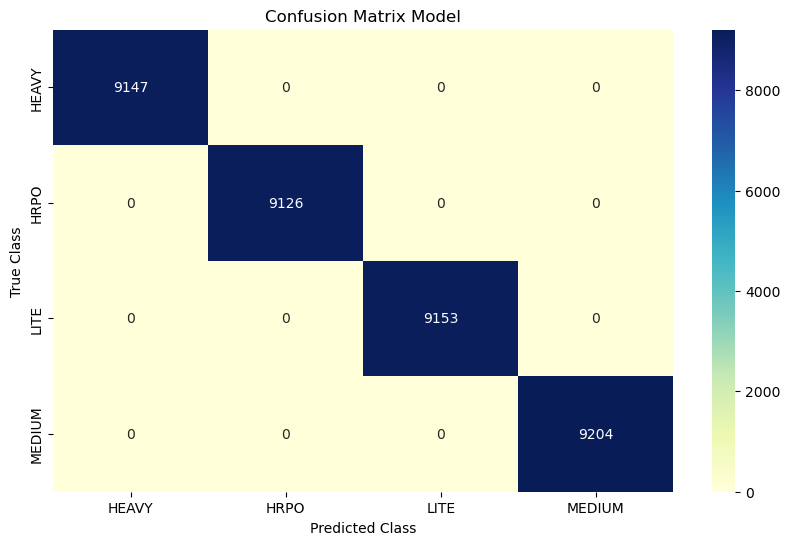

In [70]:
fig = plt.figure(figsize = (10, 6))
target_names=['HEAVY', 'HRPO', 'LITE', 'MEDIUM']
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu', yticklabels=target_names, xticklabels=target_names)

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)
rf_pred

y_test

print ('accuracy_score: ',accuracy_score(y_test, rf_pred))
print ('f1_score: ',f1_score(y_test, rf_pred, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test, rf_pred, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test, rf_pred, pos_label='positive', average='micro'))

print(classification_report(y_test, rf_pred))

cm = confusion_matrix(y_test, rf_pred)
cm

fig = plt.figure(figsize = (10, 6))
target_names=['HEAVY', 'HRPO', 'LITE', 'MEDIUM']
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu', yticklabels=target_names, xticklabels=target_names)

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

#### Regressor

In [71]:
rf_r = RandomForestRegressor()
rf_r.fit(X_train,y_train)

RandomForestRegressor()

In [72]:
rf_r_pred = np.round(rf_r.predict(X_test))
rf_r_pred

array([3., 0., 0., ..., 2., 1., 2.])

In [73]:
y_test

117524    3
129051    0
118113    0
222701    1
180495    1
         ..
235954    1
9381      0
297108    2
206941    1
256003    2
Name: Cycle, Length: 36630, dtype: int32

In [74]:
print ('accuracy_score: ',accuracy_score(y_test, rf_r_pred))
print ('f1_score: ',f1_score(y_test, rf_r_pred, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test, rf_r_pred, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test, rf_r_pred, pos_label='positive', average='micro'))

accuracy_score:  1.0
f1_score:  1.0
recall_score:  1.0
precision_score:  1.0


## XGBoost Model

In [75]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [76]:
xgb_pred = xgb.predict(X_test)
xgb_pred

array([3, 0, 0, ..., 2, 1, 2], dtype=int64)

In [77]:
y_test

117524    3
129051    0
118113    0
222701    1
180495    1
         ..
235954    1
9381      0
297108    2
206941    1
256003    2
Name: Cycle, Length: 36630, dtype: int32

In [78]:
print ('accuracy_score: ',accuracy_score(y_test, xgb_pred))
print ('f1_score: ',f1_score(y_test, xgb_pred, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test, xgb_pred, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test, xgb_pred, pos_label='positive', average='micro'))

accuracy_score:  1.0
f1_score:  1.0
recall_score:  1.0
precision_score:  1.0


In [79]:
print(classification_report(y_test, xgb_pred, target_names=['HEAVY', 'HRPO', 'LITE', 'MEDIUM']))

              precision    recall  f1-score   support

       HEAVY       1.00      1.00      1.00      9147
        HRPO       1.00      1.00      1.00      9126
        LITE       1.00      1.00      1.00      9153
      MEDIUM       1.00      1.00      1.00      9204

    accuracy                           1.00     36630
   macro avg       1.00      1.00      1.00     36630
weighted avg       1.00      1.00      1.00     36630



In [80]:
cm = confusion_matrix(y_test, xgb_pred)
cm

array([[9147,    0,    0,    0],
       [   0, 9126,    0,    0],
       [   0,    0, 9153,    0],
       [   0,    0,    0, 9204]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

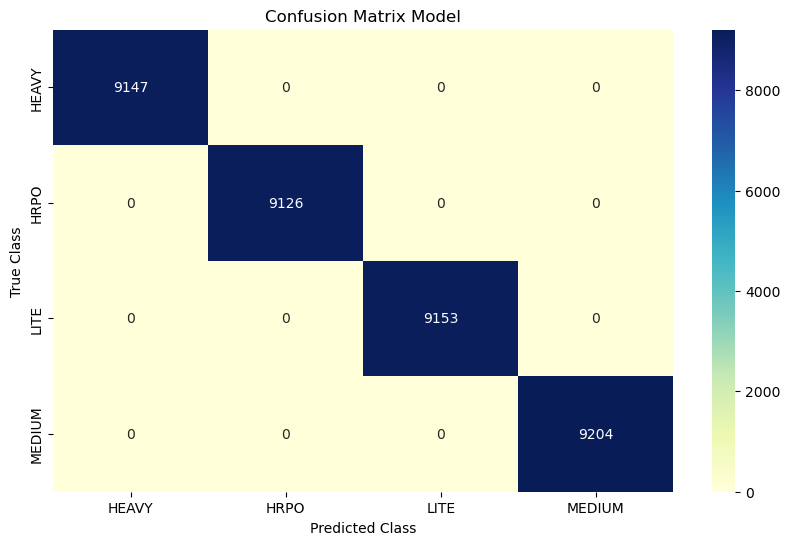

In [81]:
fig = plt.figure(figsize = (10, 6))
target_names=['HEAVY', 'HRPO', 'LITE', 'MEDIUM']
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu', yticklabels=target_names, xticklabels=target_names)

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

#### Regressor

In [82]:
xgb_r = XGBRegressor()
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [83]:
xgb_r_pred = np.round(xgb_r.predict(X_test))
xgb_r_pred

array([3., 0., 0., ..., 2., 1., 2.], dtype=float32)

In [84]:
y_test

117524    3
129051    0
118113    0
222701    1
180495    1
         ..
235954    1
9381      0
297108    2
206941    1
256003    2
Name: Cycle, Length: 36630, dtype: int32

In [85]:
print ('accuracy_score: ',accuracy_score(y_test, xgb_r_pred))
print ('f1_score: ',f1_score(y_test, xgb_r_pred, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test, xgb_r_pred, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test, xgb_r_pred, pos_label='positive', average='micro'))

accuracy_score:  1.0
f1_score:  1.0
recall_score:  1.0
precision_score:  1.0


## Light Gradient Boosting Model (LGBM)

In [86]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [87]:
lgbm_pred = lgbm.predict(X_test)
lgbm_pred

array([3, 0, 0, ..., 2, 1, 2])

In [88]:
y_test

117524    3
129051    0
118113    0
222701    1
180495    1
         ..
235954    1
9381      0
297108    2
206941    1
256003    2
Name: Cycle, Length: 36630, dtype: int32

In [89]:
print ('accuracy_score: ',accuracy_score(y_test, lgbm_pred))
print ('f1_score: ',f1_score(y_test, lgbm_pred, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test, lgbm_pred, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test, lgbm_pred, pos_label='positive', average='micro'))

accuracy_score:  1.0
f1_score:  1.0
recall_score:  1.0
precision_score:  1.0


In [90]:
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9147
           1       1.00      1.00      1.00      9126
           2       1.00      1.00      1.00      9153
           3       1.00      1.00      1.00      9204

    accuracy                           1.00     36630
   macro avg       1.00      1.00      1.00     36630
weighted avg       1.00      1.00      1.00     36630



In [91]:
cm = confusion_matrix(y_test, lgbm_pred)
cm

array([[9147,    0,    0,    0],
       [   0, 9126,    0,    0],
       [   0,    0, 9153,    0],
       [   0,    0,    0, 9204]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

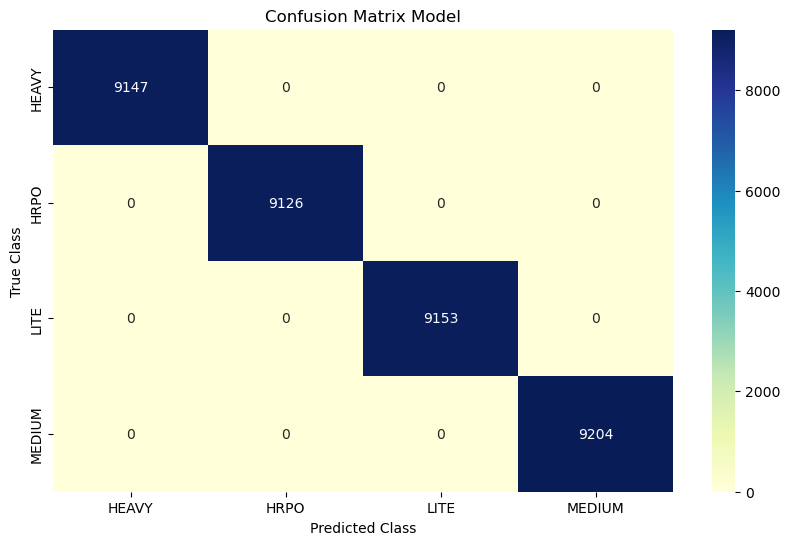

In [92]:
fig = plt.figure(figsize = (10, 6))
target_names=['HEAVY', 'HRPO', 'LITE', 'MEDIUM']
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu', yticklabels=target_names, xticklabels=target_names)

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

#### Regressor

In [93]:
lgbm_r = LGBMRegressor()
lgbm_r.fit(X_train, y_train)

LGBMRegressor()

In [94]:
lgbm_r_pred = np.round(lgbm_r.predict(X_test))
lgbm_r_pred

array([3., 0., 0., ..., 2., 1., 2.])

In [95]:
y_test

117524    3
129051    0
118113    0
222701    1
180495    1
         ..
235954    1
9381      0
297108    2
206941    1
256003    2
Name: Cycle, Length: 36630, dtype: int32

In [96]:
print ('accuracy_score: ',accuracy_score(y_test, lgbm_r_pred))
print ('f1_score: ',f1_score(y_test, lgbm_r_pred, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test, lgbm_r_pred, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test, lgbm_r_pred, pos_label='positive', average='micro'))

accuracy_score:  1.0
f1_score:  1.0
recall_score:  1.0
precision_score:  1.0


# ANN Model

In [66]:
y_train = np_utils.to_categorical(y_train, num_classes = 4)
y_test = np_utils.to_categorical(y_test, num_classes = 4)

In [67]:
#Mendefinisikan Model CNN
def get_model_ann(batch_size, learning_rate):
    model = Sequential()
    model.add(Dense(16,activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(4,activation='softmax')) 
    model.compile(loss ='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=learning_rate),metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])
    return model

In [68]:
#Mendefinisikan Model 
model_ann = KerasClassifier(build_fn=get_model_ann)

#Parameter yang dihypermarameter tuning
params_ann= {'batch_size': [64, 128],
             'learning_rate':[0.01, 0.001]}

In [69]:
ann = GridSearchCV(model_ann, param_grid=params_ann)

In [70]:
history = ann.fit(X_train, y_train)

Epoch 1/100
5152/5152 [==============================] - 19s 4ms/step - loss: 0.1892 - accuracy: 0.9285 - val_loss: 0.0216 - val_accuracy: 0.9959
Epoch 2/100
5152/5152 [==============================] - 19s 4ms/step - loss: 0.2406 - accuracy: 0.9078 - val_loss: 0.0973 - val_accuracy: 0.9933
Epoch 3/100
5152/5152 [==============================] - 19s 4ms/step - loss: 0.1116 - accuracy: 0.9654 - val_loss: 0.0602 - val_accuracy: 0.9972
Epoch 4/100
5152/5152 [==============================] - 19s 4ms/step - loss: 0.1312 - accuracy: 0.9547 - val_loss: 0.7889 - val_accuracy: 0.8005
Epoch 5/100
5152/5152 [==============================] - 19s 4ms/step - loss: 0.3170 - accuracy: 0.8569 - val_loss: 0.7327 - val_accuracy: 0.6365
Epoch 6/100
5152/5152 [==============================] - 19s 4ms/step - loss: 0.1713 - accuracy: 0.9320 - val_loss: 0.0456 - val_accuracy: 0.9968
Epoch 7/100
5152/5152 [==============================] - 19s 4ms/step - loss: 0.0845 - accuracy: 0.9767 - val_loss: 0.0068 -

5152/5152 [==============================] - 19s 4ms/step - loss: 0.2189 - accuracy: 0.8808 - val_loss: 0.2911 - val_accuracy: 0.7466
Epoch 40/100
5152/5152 [==============================] - 19s 4ms/step - loss: 0.0463 - accuracy: 0.9803 - val_loss: 0.2986 - val_accuracy: 0.9072
Epoch 41/100
5152/5152 [==============================] - 19s 4ms/step - loss: 0.0398 - accuracy: 0.9897 - val_loss: 0.0662 - val_accuracy: 0.9870
Epoch 42/100
5152/5152 [==============================] - 19s 4ms/step - loss: 0.0454 - accuracy: 0.9898 - val_loss: 2.2162 - val_accuracy: 0.5839
Epoch 43/100
5152/5152 [==============================] - 19s 4ms/step - loss: 0.2031 - accuracy: 0.8979 - val_loss: 0.0036 - val_accuracy: 0.9998
Epoch 44/100
1031/1031 [==============================] - 3s 3ms/step - loss: 0.0109 - accuracy: 0.9988
Epoch 1/100
5152/5152 [==============================] - 20s 4ms/step - loss: 0.1630 - accuracy: 0.9389 - val_loss: 0.0878 - val_accuracy: 0.9868
Epoch 2/100
5152/5152 [=====

5152/5152 [==============================] - 19s 4ms/step - loss: 0.0068 - accuracy: 0.9987 - val_loss: 3.0131e-04 - val_accuracy: 1.0000
Epoch 22/100
5152/5152 [==============================] - 18s 4ms/step - loss: 0.0085 - accuracy: 0.9987 - val_loss: 1.9857e-04 - val_accuracy: 1.0000
Epoch 23/100
5152/5152 [==============================] - 18s 4ms/step - loss: 0.0161 - accuracy: 0.9982 - val_loss: 0.0023 - val_accuracy: 0.9999
Epoch 24/100
5152/5152 [==============================] - 18s 4ms/step - loss: 0.0081 - accuracy: 0.9987 - val_loss: 1.6258e-04 - val_accuracy: 1.0000
Epoch 25/100
5152/5152 [==============================] - 18s 4ms/step - loss: 0.0120 - accuracy: 0.9987 - val_loss: 6.9640e-05 - val_accuracy: 1.0000
Epoch 26/100
5152/5152 [==============================] - 18s 4ms/step - loss: 0.0154 - accuracy: 0.9978 - val_loss: 5.8543e-04 - val_accuracy: 1.0000
Epoch 27/100
5152/5152 [==============================] - 18s 4ms/step - loss: 0.0083 - accuracy: 0.9988 - val_

Epoch 29/100
5152/5152 [==============================] - 19s 4ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 3.8983e-04 - val_accuracy: 0.9999
Epoch 30/100
5152/5152 [==============================] - 19s 4ms/step - loss: 0.0097 - accuracy: 0.9984 - val_loss: 9.1821e-04 - val_accuracy: 1.0000
Epoch 31/100
5152/5152 [==============================] - 19s 4ms/step - loss: 0.0057 - accuracy: 0.9991 - val_loss: 1.8267e-04 - val_accuracy: 1.0000
Epoch 32/100
5152/5152 [==============================] - 19s 4ms/step - loss: 0.0114 - accuracy: 0.9982 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 33/100
5152/5152 [==============================] - 18s 4ms/step - loss: 0.0072 - accuracy: 0.9993 - val_loss: 0.0027 - val_accuracy: 0.9998
Epoch 34/100
5152/5152 [==============================] - 18s 4ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 3.4319e-04 - val_accuracy: 1.0000
Epoch 35/100
5152/5152 [==============================] - 18s 4ms/step - loss: 0.0031 - accuracy: 0.99

5152/5152 [==============================] - 18s 4ms/step - loss: 0.0287 - accuracy: 0.9937 - val_loss: 0.0243 - val_accuracy: 0.9940
Epoch 5/100
5152/5152 [==============================] - 18s 4ms/step - loss: 0.0199 - accuracy: 0.9959 - val_loss: 0.0019 - val_accuracy: 0.9999
Epoch 6/100
5152/5152 [==============================] - 18s 4ms/step - loss: 0.0320 - accuracy: 0.9916 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/100
5152/5152 [==============================] - 19s 4ms/step - loss: 0.0259 - accuracy: 0.9927 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 8/100
5152/5152 [==============================] - 18s 4ms/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 9/100
5152/5152 [==============================] - 18s 4ms/step - loss: 0.0406 - accuracy: 0.9869 - val_loss: 0.0018 - val_accuracy: 0.9997
Epoch 10/100
5152/5152 [==============================] - 20s 4ms/step - loss: 0.0505 - accuracy: 0.9811 - val_loss: 0.1217 - val_accura

2576/2576 [==============================] - 9s 4ms/step - loss: 0.0820 - accuracy: 0.9768 - val_loss: 0.0048 - val_accuracy: 0.9999
Epoch 3/100
2576/2576 [==============================] - 9s 4ms/step - loss: 0.0881 - accuracy: 0.9780 - val_loss: 0.0336 - val_accuracy: 0.9870
Epoch 4/100
2576/2576 [==============================] - 9s 4ms/step - loss: 0.1052 - accuracy: 0.9665 - val_loss: 0.0079 - val_accuracy: 0.9986
Epoch 5/100
2576/2576 [==============================] - 9s 4ms/step - loss: 0.1035 - accuracy: 0.9709 - val_loss: 0.0118 - val_accuracy: 0.9995
Epoch 6/100
2576/2576 [==============================] - 9s 4ms/step - loss: 0.1588 - accuracy: 0.9458 - val_loss: 0.0158 - val_accuracy: 0.9999
Epoch 7/100
2576/2576 [==============================] - 9s 4ms/step - loss: 0.0176 - accuracy: 0.9964 - val_loss: 4.5490e-04 - val_accuracy: 1.0000
Epoch 8/100
2576/2576 [==============================] - 9s 4ms/step - loss: 0.0613 - accuracy: 0.9870 - val_loss: 0.0043 - val_accuracy: 

2576/2576 [==============================] - 10s 4ms/step - loss: 0.0141 - accuracy: 0.9984 - val_loss: 6.6757e-04 - val_accuracy: 0.9998
Epoch 36/100
2576/2576 [==============================] - 10s 4ms/step - loss: 0.0135 - accuracy: 0.9983 - val_loss: 0.0019 - val_accuracy: 0.9993
Epoch 37/100
2576/2576 [==============================] - 10s 4ms/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 5.9261e-04 - val_accuracy: 0.9997
Epoch 38/100
2576/2576 [==============================] - 10s 4ms/step - loss: 0.0067 - accuracy: 0.9992 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 39/100
516/516 [==============================] - 2s 3ms/step - loss: 9.5739e-04 - accuracy: 0.9997
Epoch 1/100
2576/2576 [==============================] - 10s 4ms/step - loss: 0.2067 - accuracy: 0.9199 - val_loss: 0.0555 - val_accuracy: 0.9794
Epoch 2/100
2576/2576 [==============================] - 10s 4ms/step - loss: 0.0349 - accuracy: 0.9932 - val_loss: 0.0108 - val_accuracy: 0.9992
Epoch 3/100
2576/25

2576/2576 [==============================] - 10s 4ms/step - loss: 0.0083 - accuracy: 0.9988 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 24/100
2576/2576 [==============================] - 10s 4ms/step - loss: 0.0137 - accuracy: 0.9981 - val_loss: 0.0012 - val_accuracy: 0.9999
Epoch 25/100
2576/2576 [==============================] - 10s 4ms/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 6.5135e-04 - val_accuracy: 1.0000
Epoch 26/100
2576/2576 [==============================] - 10s 4ms/step - loss: 0.0067 - accuracy: 0.9988 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 27/100
2576/2576 [==============================] - 10s 4ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 6.1410e-04 - val_accuracy: 1.0000
Epoch 28/100
2576/2576 [==============================] - 10s 4ms/step - loss: 0.0159 - accuracy: 0.9978 - val_loss: 9.1823e-04 - val_accuracy: 1.0000
Epoch 29/100
2576/2576 [==============================] - 10s 4ms/step - loss: 0.0091 - accuracy: 0.9987 - val_loss: 0.

516/516 [==============================] - 2s 3ms/step - loss: 9.4922e-04 - accuracy: 0.9999
Epoch 1/100
5152/5152 [==============================] - 19s 4ms/step - loss: 0.2033 - accuracy: 0.9197 - val_loss: 0.0378 - val_accuracy: 0.9877
Epoch 2/100
5152/5152 [==============================] - 18s 4ms/step - loss: 0.0492 - accuracy: 0.9882 - val_loss: 0.0569 - val_accuracy: 0.9943
Epoch 3/100
5152/5152 [==============================] - 18s 4ms/step - loss: 0.0321 - accuracy: 0.9936 - val_loss: 0.0130 - val_accuracy: 0.9988
Epoch 4/100
5152/5152 [==============================] - 18s 4ms/step - loss: 0.0190 - accuracy: 0.9960 - val_loss: 0.0052 - val_accuracy: 0.9996
Epoch 5/100
5152/5152 [==============================] - 18s 4ms/step - loss: 0.0235 - accuracy: 0.9954 - val_loss: 0.0152 - val_accuracy: 0.9996
Epoch 6/100
5152/5152 [==============================] - 18s 4ms/step - loss: 0.0135 - accuracy: 0.9976 - val_loss: 0.0015 - val_accuracy: 0.9994
Epoch 7/100
5152/5152 [========

In [72]:
print("\n Parameter Terbaik  {}".format(history.best_params_))
print("\n Accuracy Terbaik  {}".format(history.best_score_))


 Parameter Terbaik  {'batch_size': 64, 'learning_rate': 0.001}

 Accuracy Terbaik  0.9996936321258545


In [74]:
# melihat hasil parameter terbaik
print("Best: %f using %s" % (history.best_score_, history.best_params_))
means = history.cv_results_['mean_test_score']
stds = history.cv_results_['std_test_score']
params = history.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# mengambil model terbaik
best_model = history.best_estimator_.model

Best: 0.999694 using {'batch_size': 64, 'learning_rate': 0.001}
0.927558 (0.143960) with: {'batch_size': 64, 'learning_rate': 0.01}
0.999694 (0.000408) with: {'batch_size': 64, 'learning_rate': 0.001}
0.999223 (0.000641) with: {'batch_size': 128, 'learning_rate': 0.01}
0.999457 (0.000618) with: {'batch_size': 128, 'learning_rate': 0.001}


In [ ]:
model.add(Dense(16,activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(loss ='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
model.summary()

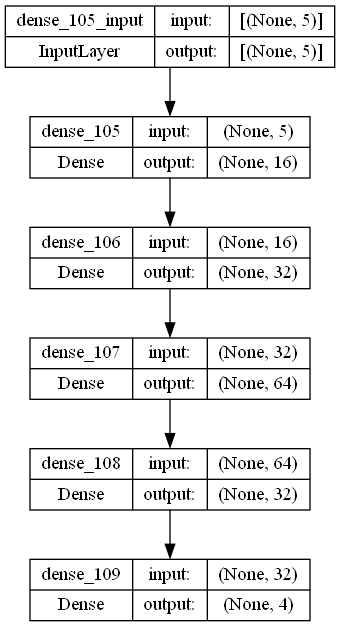

In [76]:
plot_model(model, show_shapes=True)

In [77]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
5152/5152 [==============================] - 18s 3ms/step - loss: 0.1655 - accuracy: 0.9373 - val_loss: 0.1172 - val_accuracy: 0.9451
Epoch 2/100
5152/5152 [==============================] - 17s 3ms/step - loss: 0.0441 - accuracy: 0.9884 - val_loss: 0.0083 - val_accuracy: 0.9988
Epoch 3/100
5152/5152 [==============================] - 17s 3ms/step - loss: 0.0352 - accuracy: 0.9926 - val_loss: 0.0030 - val_accuracy: 0.9999
Epoch 4/100
5152/5152 [==============================] - 21s 4ms/step - loss: 0.0327 - accuracy: 0.9929 - val_loss: 0.0042 - val_accuracy: 0.9988
Epoch 5/100
5152/5152 [==============================] - 22s 4ms/step - loss: 0.0379 - accuracy: 0.9907 - val_loss: 0.0074 - val_accuracy: 0.9995
Epoch 6/100
5152/5152 [==============================] - 21s 4ms/step - loss: 0.0379 - accuracy: 0.9909 - val_loss: 0.0042 - val_accuracy: 0.9995
Epoch 7/100
5152/5152 [==============================] - 25s 5ms/step - loss: 0.0210 - accuracy: 0.9959 - val_loss: 0.0062 -

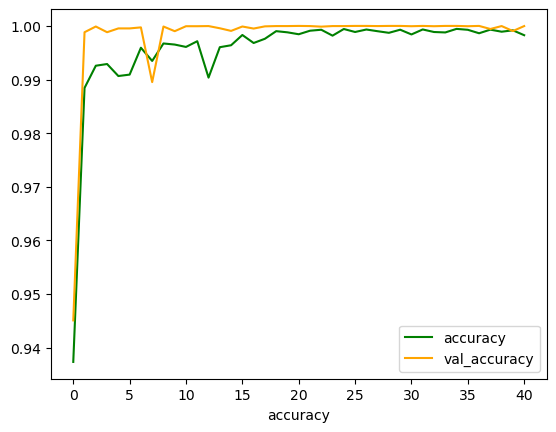

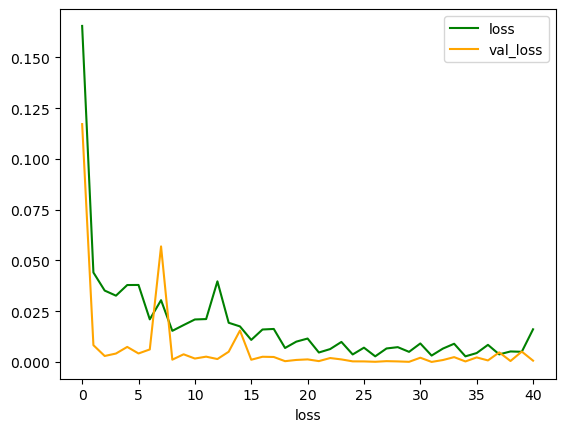

In [78]:
def plot_graphs(history, string):
    plt.plot(history.history[string], color = 'green')
    plt.plot(history.history['val_'+string], color = 'orange')
    plt.xlabel('epoch')
    plt.xlabel(string)
    plt.legend([string, "val_"+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [79]:
evaluation = model.evaluate(X_test, y_test)

1145/1145 [==============================] - 3s 2ms/step - loss: 0.0013 - accuracy: 1.0000


In [80]:
ann_pred = np.argmax(model.predict(X_test),axis=1)
ann_pred

1145/1145 [==============================] - 4s 3ms/step


array([3, 0, 0, ..., 2, 1, 2], dtype=int64)

In [81]:
y_test = np.argmax(y_test,axis=1)
y_test

array([3, 0, 0, ..., 2, 1, 2], dtype=int64)

In [82]:
print ('accuracy_score: ',accuracy_score(y_test,ann_pred))
print ('f1_score: ',f1_score(y_test,ann_pred, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test,ann_pred, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test,ann_pred, pos_label='positive', average='micro'))

accuracy_score:  1.0
f1_score:  1.0
recall_score:  1.0
precision_score:  1.0


In [83]:
print(classification_report(y_test, ann_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9147
           1       1.00      1.00      1.00      9126
           2       1.00      1.00      1.00      9153
           3       1.00      1.00      1.00      9204

    accuracy                           1.00     36630
   macro avg       1.00      1.00      1.00     36630
weighted avg       1.00      1.00      1.00     36630



In [84]:
cm = confusion_matrix(y_test, ann_pred)
cm

array([[9147,    0,    0,    0],
       [   0, 9126,    0,    0],
       [   0,    0, 9153,    0],
       [   0,    0,    0, 9204]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

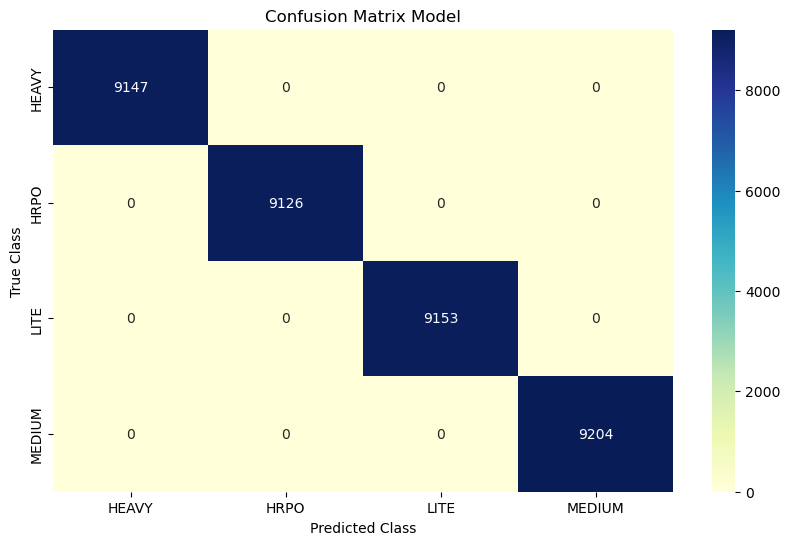

In [85]:
fig = plt.figure(figsize = (10, 6))
target_names=['HEAVY', 'HRPO', 'LITE', 'MEDIUM']
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu', yticklabels=target_names, xticklabels=target_names)

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

### Save model

In [ ]:
import pickle, os

In [118]:
os.makedirs('model', exist_ok=True)

In [119]:
# Klasifikasi 
pickle.dump(knn, open("model/knn_klasifikasi.pkl", "wb"))
pickle.dump(dtree, open("model/decisiontree_klasifikasi.pkl", "wb"))
pickle.dump(rf, open("model/randomforest_klasifikasi.pkl", "wb"))
pickle.dump(xgb, open("model/xgboost_klasifikasi.pkl", "wb"))
pickle.dump(lgbm, open("model/lgboost_klasifikasi.pkl", "wb"))

# Regresi 
pickle.dump(knn_r, open("model/knn_regresi.pkl", "wb"))
pickle.dump(dtree_r, open("model/decisiontree_regresi.pkl", "wb"))
pickle.dump(rf_r, open("model/randomforest_regresi.pkl", "wb"))
pickle.dump(xgb_r, open("model/xgboost_regresi.pkl", "wb"))
pickle.dump(lgbm_r, open("model/lgboost_regresi.pkl", "wb"))

# Model ANN
model.save('ann.h5')

INFO:tensorflow:Assets written to: ram://e043c6ad-9d70-44c4-943f-f9e3d948ccbd/assets


## 2. Clustering

In [ ]:
kolom=['THICK', 'WIDTH', 'WEIGHT', 'OA2VNGAUGE', 'OA2VNWIDTH', 'OA2VNWEIGHT']
scaled_ds=scaler.fit_transform(data[kolom])
scaled_ds

In [66]:
data[kolom]=scaled_ds
data

,COILNO,ORDERNO,SO,ITEM,SIZE_,QUALCODE,GRADE,SPEC,SUBSPEC,THICK,...,OA2VNWIDTH,OA2VNWEIGHT,REMARK,OBKDFMILL1,OBKDFCODE1,OBKDFMILL2,OBKDFCODE2,OBKDFMILL3,OBKDFCODE3,Cycle
0,793941VB,27118888,6000051323,50,"1,00 X 1219 X COIL",CQ2,3A0603,SNI 07 3567,BJDC-SR,-0.125519,...,0.736753,-1.267453,- ...,X,60B,K,37A,,,HEAVY
1,845516V,27119071,6000050693,60,"1,30 X 1219 X COIL",CQ4,1K1407,MPIC,MPIC,0.168483,...,0.616737,0.608391,- ...,H,20B,K,37A,H,59A,HEAVY
2,845859VA,27119164,6000052359,50,"0,35 X 1170 X COIL",CQUN1,3A0603,SNI 07 3567,BJDC-1R,-0.762522,...,0.456715,0.185965,- ...,F,11,F,70A,F,69,MEDIUM
3,848033VB,27119203,6000052359,50,"0,35 X 1170 X COIL",CQUN1,3A0603,SNI 07 3567,BJDC-1R,-0.762522,...,0.456715,0.488106,- ...,F,11,F,13,F,27A,MEDIUM
4,868211VA,27117709,6000052359,80,"0,45 X 914 X COIL",CQUN1,3A0603,SNI 07 3567,BJDC-1R,-0.664522,...,-1.006345,-1.448198,- ...,F,2,F,98,F,60,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477094,BGA114V,17067401,6000074610,30,"0,70 X 1000 X COIL",CQ2,3A0603,JIS G3141,SPCC-SD,-1.105524,...,-0.606289,0.162479,- ...,,,,,,,LITE
477095,BDY169V,17064503,6000072642,10,"0,50 X 1030 X COIL",CQ2,3A0603,JIS G3141,SPCC-SD,-1.105524,...,-0.434837,0.097417,- ...,,,,,,,LITE
477096,BEN934V,17065724,6000073153,20,"1,20 X 1219 X COIL",CQ2,1A0503,JIS G3141,SPCC-SD,-1.105524,...,0.645312,1.160623,- ...,,,,,,,LITE
477097,BFD911V,17066503,6000073749,70,"0,95 X 1219 X COIL",CQ2,1A0603,JIS G3141,SPCCT-SD,-1.105524,...,0.645312,0.556024,- ...,,,,,,,LITE


In [67]:
columns = ['COILNO', 'ORDERNO', 'SO', 'ITEM','SIZE_', 'GRADE', 'SUBSPEC', 'DISPCODE', 'PRODUNIT', 
           'LOCATION', 'PRODDATE', 'OBKPRODTND', 'REMARK', 'OBKDFMILL1', 'OBKDFCODE1', 'OBKDFMILL2', 'OBKDFCODE2',
           'OBKDFMILL3', 'OBKDFCODE3','Cycle','QUALCODE','SPEC']

data.drop(columns=columns, inplace=True)
data

,THICK,WIDTH,WEIGHT,OA2VNGAUGE,OA2VNWIDTH,OA2VNWEIGHT
0,-0.125519,0.607236,-0.828195,-0.493285,0.736753,-1.267453
1,0.168483,0.607236,0.526397,1.178529,0.616737,0.608391
2,-0.762522,0.453034,0.056208,-0.493285,0.456715,0.185965
3,-0.762522,0.453034,0.347277,-0.493285,0.456715,0.488106
4,-0.664522,-0.352593,-1.463109,-0.493285,-1.006345,-1.448198
...,...,...,...,...,...,...
477094,-1.105524,-3.228933,0.169757,-0.158922,-0.606289,0.162479
477095,-1.105524,-3.228933,0.156963,-0.493285,-0.434837,0.097417
477096,-1.105524,-3.228933,1.210889,1.178529,0.645312,1.160623
477097,-1.105524,-3.228933,0.611159,0.509804,0.645312,0.556024


In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)
PCA_ds = pd.DataFrame(pca.transform(data), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,477099.0,-5.365348e-16,1.486605,-3.708325,-1.274493,0.077599,0.854987,6.441625
col2,477099.0,5.541753e-16,1.276698,-6.204816,-0.741493,0.202783,0.766974,6.433386


In [69]:
PCA_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477099 entries, 0 to 477098
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   col1    477099 non-null  float64
 1   col2    477099 non-null  float64
dtypes: float64(2)
memory usage: 7.3 MB


In [70]:
PCA_ds

,col1,col2
0,1.003529,-1.014475
1,-1.371534,-0.626373
2,-0.044959,0.342866
3,-0.389419,0.572269
4,2.451356,-0.121345
...,...,...
477094,0.952958,2.246964
477095,1.026441,2.314474
477096,-1.073523,2.023885
477097,-0.188454,1.863554


Elbow Method to determine the number of clusters to be formed:


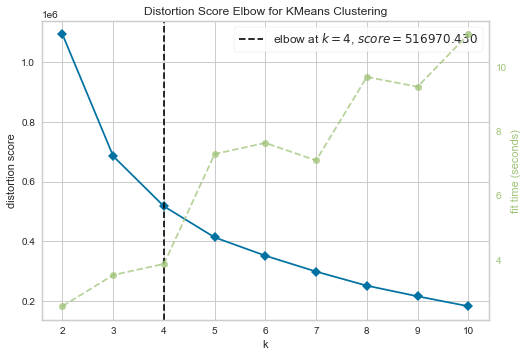

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [72]:
# inisialisasi model k-means dengan jumlah cluster yang telah di ditentukan
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(PCA_ds)


In [73]:
PCA_ds['Label']=label

In [74]:
PCA_ds

,col1,col2,Label
0,1.003529,-1.014475,0
1,-1.371534,-0.626373,1
2,-0.044959,0.342866,3
3,-0.389419,0.572269,3
4,2.451356,-0.121345,2
...,...,...,...
477094,0.952958,2.246964,3
477095,1.026441,2.314474,3
477096,-1.073523,2.023885,3
477097,-0.188454,1.863554,3


In [81]:
PCA_ds['Label'].value_counts()

1    196236
3    134460
0     92454
2     53949
Name: Label, dtype: int64

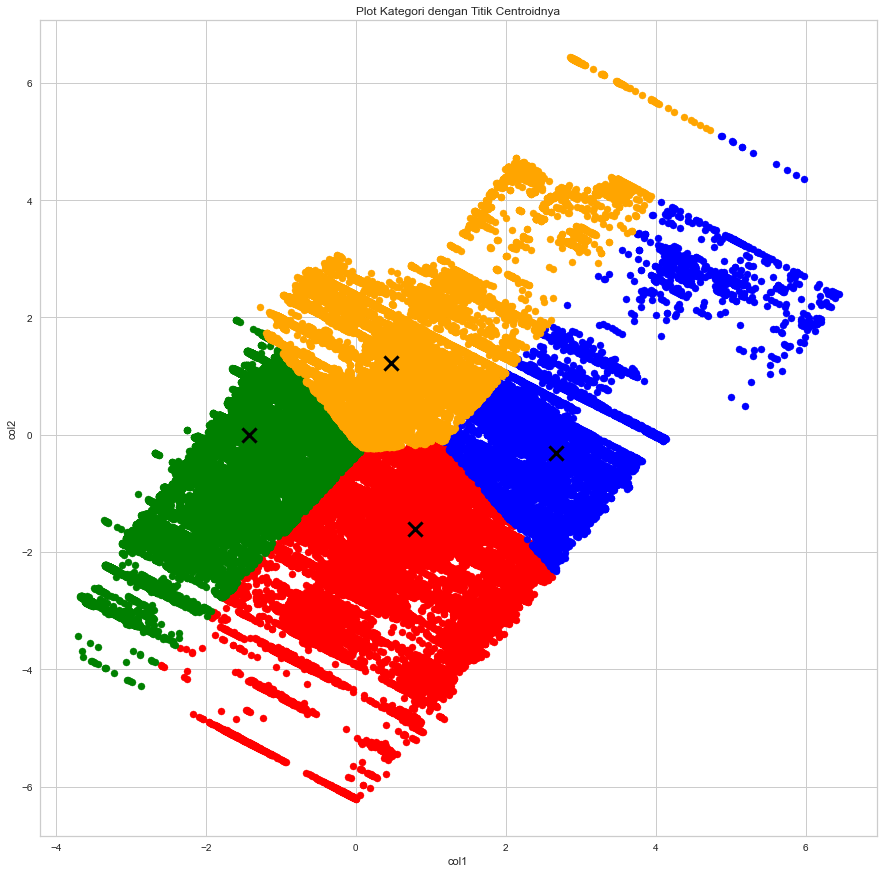

In [108]:
# Menghitung titik centroid untuk setiap kategori
centroids = PCA_ds.groupby('Label')[['col1', 'col2']].mean()

# Membuat plot untuk masing-masing kategori dan centroid
fig, ax = plt.subplots(figsize=(15, 15))
colors = ['red', 'green', 'blue', 'orange', 'purple']
for label, color in enumerate(colors[:len(centroids)]):
    indices = PCA_ds['Label'] == label
    ax.scatter(PCA_ds.loc[indices, 'col1'], PCA_ds.loc[indices, 'col2'], c=color, s=50)
    centroid = centroids.loc[label]
    ax.scatter(centroid[0], centroid[1], marker='x', s=200, linewidths=3, color='black')

# Menambahkan judul dan label sumbu
ax.set_title('Plot Kategori dengan Titik Centroidnya')
ax.set_xlabel('col1')
ax.set_ylabel('col2')

# Menampilkan plot
plt.show()